## TEST: loading pytorch and the MNIST dataset

In my exercice session, I will provide an introduction to PyTorch and how to use it to simulate neural networks with custom devices. PyTorch is an open source Python-based library for neural network simulations, widely used in the community.

For this, it is critical that you have a working installation of PyTorch and have loaded the MNIST dataset. 

Please make sure all cells of this test code are executed correctly on the machine that you will use for the class.

## We import key python and pytorch packages

Please install the packages below:
- numpy
- matplotlib
- torch
- torchvision
- scikit-learn

Here are instruction for getting PyTorch related packages: https://pytorch.org/get-started/locally/

In [1]:
import numpy as np  # to handle operations on arrays of numbers, similar to matlab
import matplotlib.pyplot as plt  # to plot figures
import torch
import torch.nn as nn
import torch.optim
from torchvision import datasets, transforms
import sklearn as skl

/Users/alice/opt/anaconda3/envs/DL/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## We load the MNIST dataset

Here we made a dataloader using pytorch tools. This will download MNIST for you and make it into the dataset format to feed the neural network. 

MNIST is a widely used dataset for machine learning. It is composed of grayscale images of handwritten digits, each of 28-by-28 pixels. There are ten classes, for the digits 0 to 9.
Let's look at the dataset.

In [2]:
transform_mnist = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

def load_MNIST(batch_size):
    train_loader = torch.utils.data.DataLoader(
            datasets.MNIST('data', train=True, download=True, transform=transform_mnist),
            batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('data', train=False, download=True, transform=transform_mnist),
            batch_size=batch_size, shuffle=True)
    return train_loader, test_loader, 784, 10

In [3]:
batch_size = 1000  # the number of examples per batch
train_loader, test_loader, dim_in, dim_out = load_MNIST(batch_size=batch_size)

Let's display an example of image. You can change the index to look at different examples.

The shape of the inputs is: torch.Size([28, 28]) => a pytorch tensor of dimensions (28, 28)
The class here is 1


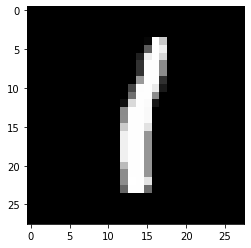

In [4]:
ex_index = 6575 # pick random index for the example
img = train_loader.dataset.data[ex_index]  # we take the DATA corresponding to this index
print(f'The shape of the inputs is: {img.shape} => a pytorch tensor of dimensions (28, 28)')
digit_class = train_loader.dataset.targets[ex_index]  # we take the TARGET class corresponding to this index
plt.imshow(img, cmap="gray")
print(f'The class here is {digit_class.numpy()}')

In [5]:
print(f'The number of train examples is {batch_size * len(train_loader)}')
print(f'The number of test examples is {batch_size * len(test_loader)}')

The number of train examples is 60000
The number of test examples is 10000
